# SQL Data Modeling

## Instructions
1.	You have a single large table in a relational database with hundreds of columns that describe medical procedures performed, along with their dates and amounts.  
●	Ellipses (...), represent multiple rows of a similar type


### TABLE: patient_procedure_info
| patient_id | patient_attribute_1 | ...       | patient_attribute_20 |   |
|------------|---------------------|-----------|----------------------|---|
| 000000a    | 000000000           | 000000000 | 000000000            |   |
| ...        | ...                 | ...       | ...                  |   |
| 000000z    | 000000000           | 000000000 | 000000000            |   |

### TABLE: diagnosis_info
| patient_id | patient_diagnosis_code_1 | ...       | patient_diagnosis_code_100 |   |
|------------|--------------------------|-----------|----------------------------|---|
| 000000a    | a00.000                  | a00.000   | a00.000                    |   |
| ...        | ...                      | ...       | ...                        |   |
| 000000z    | a00.000                  | a00.000   | a00.000                    |   |

### TABLE: visit_log
| visit_id | patient_id | physician_id | physician_attribute_1 | ...       | physician_attribute_20 | visit_date | procedure_code | utilization_quantity | expenditure_amount |   |
|----------|------------|--------------|-----------------------|-----------|------------------------|------------|----------------|----------------------|--------------------|---|
| 000000   | 000000a    | 000000a      | 000000000             | 000000000 | 000000000              | yyyy-mm-dd | 000000000      | 00                   | \$0000000000.00    |   |
| ...      | ...        | ...          | ...                   | ...       | ...                    | ...        | ...            | ...                  | ...                |   |
| 000000   | 000000z    | 000000z      | 000000000             | 000000000 | 000000000              | yyyy-mm-dd | 000000000      | 00                   | \$0000000000.00    |   |

### EXPLANATION of columns:
●	A <u>**patient**</u> has a series of attributes that have been updated as of the last doctor <u>**visit**</u>. 
\
●	A <u>**physician**</u> has a series of attributes that are static across all visits and patients.  
\
●	A patient has a list of associated health <u>**diagnosis**</u> codes updated as of the latest visit.
\
Example diagnosis_codes:
\
&nbsp;&nbsp;&nbsp;&nbsp;○	E11.9    -- generic diabetes
\
&nbsp;&nbsp;&nbsp;&nbsp;○	C61      -- prostate cancer
\
&nbsp;&nbsp;&nbsp;&nbsp;○	L89.103  -- pressure ulcer
\
●	A <u>**visit**</u> is when a specific <u>**patient**</u> sees a specific <u>**physician**</u> who provides a specific <u>**procedure**</u> on a specific <u>**date**</u>

## Questions

### a.	Write SQL to find the most common diagnosis_code.  Explain your reasoning. 

#### Functions to Synthsize Tables

* Note to self, possibily rewrite using numpy.

In [8]:
def rand_benford_letter(list_length):
    """
    Accpepts int as the length of list to be returned. 
    Function that returns a list of random letter(s) [a,z] in a randomized log-normal distribution, 
    in accordance with Benford's law:
    https://en.wikipedia.org/wiki/Benford%27s_law
    
    Parameters
    ----------
    list_length : int
        Number to specify length of randomized letter(s) to return.
        
    Returns
    -------
    list
        List of randomized log-normal distributed letter(s).

    See Also
    --------
    random.choices() : https://docs.python.org/3/library/random.html

    Examples
    --------
    >>> rand_benford_letter(3)
    ['d', 'b', 'k']
    >>> rand_benford_letter(1)
    ['k']
    >>> rand_benford_letter(10)
    ['r', 'n', 'p', 'q', 'y', 'z', 'z', 't', 'v', 'k']
    """
    
    import random
    import string
    import math
    
    # The seed() method is used to initialize the random number generator.
    # Default value is None, and if None, the generator uses the current system time.
    random.seed()
    alpha_list = []
    benford = []
    
    for x in string.ascii_lowercase:
        alpha_list.append(x)
    # Comment out for non-log-normal distribution
    for i in range(26):
        benford.append(100 * math.log10(1+1/(i+1)))
    random.shuffle(benford)
    # return random.choice(alpha_list) # Uncomment for non-log-normal distribution
    return random.choices(alpha_list, weights = benford, k = list_length)

def rand_number(number_length, decimal_length):
    """
    Accpepts int as the number of digits to be returned on both sides of the decimal point. 
    Function that returns a randomized float or an int of specified length.
    
    Parameters
    ----------
    number_length : int
        Number of digits to be returned to the left of the decimal place.
        
    decimal_length : int
        Number of digits to be returned to the right of the decimal place.
        
    Returns
    -------
    float, int, str
        Randomized number that corresponds to the decimal place input as number_length,
        on both sides of the decimal spot. If all digits to the right of the decimal are
        0, then returns an int. If digits to the left of the decimal are '0', then returns
        a str, otherwise returns a float.

    See Also
    --------
    import random : [https://docs.python.org/3/library/random.html](https://docs.python.org/3/library/random.html)

    Examples
    --------
    >>> rand_number(1, 3)
    3.011
    >>> rand_number(2, 3)
    '08.778'
    # Returns string to keep zero in tens spot.
    >>> rand_number(5, 3)
    29161 
    # Radom number was 29161.000
    """
    
    import random
    
    digits = ''
    
    for i in range(number_length):
        digits += '9' 
    digits = int(digits)
    # The seed() method is used to initialize the random number generator.
    # Default value is None, and if None, the generator uses the current system time.
    random.seed()
    rand_num = round(random.triangular(0, digits), decimal_length)
    if rand_num.is_integer():
        rand_num = int(rand_num)
    if len(str(int(rand_num))) < len(str(int(digits))):
        rand_num = '0' + str(rand_num)
        return rand_num
    else:
        return rand_num
    
def random_letter():
    import random
    import string
    
    # The seed() method is used to initialize the random number generator.
    # Default value is None, and if None, the generator uses the current system time.
    random.seed()
    alpha_list = []

    for x in string.ascii_lowercase:
        alpha_list.append(x)
    return random.choice(alpha_list) # Uncomment for non-log-normal distribution

def rand_int(*number_length):
    import random
    
    max_int = ''
    for i in range(number_length[0]):
        max_int += '9' 
    max_int = int(max_int)
    # The seed() method is used to initialize the random number generator.
    # Default value is None, and if None, the generator uses the current system time.
    random.seed()
    # rand_num = random.randint(0, max_int) # Uncomment for no weight in int range.
    
    # Comment out for no weight in int range.
    # if number_length[1].is_integer():
    try:
        rand_num = int(random.triangular(0, max_int, number_length[1]))
    # else:
    except:
        mode_num_weight = '1'
        for x in range(number_length[0] - 1):
            mode_num_weight += '0'
        mode_num_weight = int(mode_num_weight)
        rand_num = int(random.triangular(0, max_int, mode_num_weight))
    if len(str(int(rand_num))) < len(str(int(max_int))):
        rand_num = '0' + str(rand_num)
        return rand_num
    else:
        return rand_num

def rand_date(input_year, input_month, input_day):
    import random
    import datetime

    start_date = datetime.date(input_year, input_month, input_day)
    # end_date = datetime.date(2021, 2, 1)
    end_date = datetime.date.today()

    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    return random_date

In [9]:
def synthesize_attribute_list(attribute_name, max_num_of_attrib):
    attribute_name_list = []
    for x in range(max_num_of_attrib):
        # print(x + 1)
        attribute_name_list.append(attribute_name + str(x + 1))
    return attribute_name_list

In [10]:
def synthesize_patient_id_data_batch(num_of_ids):
    patient_id_list = []
    for i in range(0, num_of_ids):
        patient_id_elem = str(rand_int(6)) + random_letter()
        patient_id_list.append(patient_id_elem)
    return patient_id_list

def synthesize_patient_id_data(num_unique_patients, num_synthetic_rows):
    patient_id_data_batch = synthesize_patient_id_data_batch(num_unique_patients)
    def rand_elem():
        import random

        random.seed()
        patient_id_data_batch_elem = random.randint(1, len(patient_id_data_batch) - 1)
        return patient_id_data_batch_elem

    num_unique_patients_to_add = num_synthetic_rows - num_unique_patients
    for i in range(num_unique_patients_to_add):
        patient_id_data_batch.append(patient_id_data_batch[rand_elem()])
    return patient_id_data_batch

In [11]:
def synthesize_patient_attribute_data(num_of_ids):
    patient_attribute_list = []
    for i in range(0, num_of_ids):
        patient_attribute_list.append(rand_int(9))
    return patient_attribute_list

In [12]:
def synthesize_patient_diagnosis_data_batch(num_of_ids):
    patient_diagnosis_code_list = []
    rand_benford_letter_list = rand_benford_letter(num_of_ids)
    for i in rand_benford_letter_list:
        patient_diagnosis_code_list.append(i + str(rand_number(2,3)))
    return patient_diagnosis_code_list

def synthesize_patient_diagnosis_data(num_unique_diagnosis, num_synthetic_rows):
    synthesize_patient_diagnosis_batch = synthesize_patient_diagnosis_data_batch(num_unique_diagnosis)
    def rand_elem():
        import random

        random.seed()
        patient_diagnosis_batch_elem = random.randint(1, len(synthesize_patient_diagnosis_batch) - 1)
        return patient_diagnosis_batch_elem

    num_unique_diagnosis_to_add = num_synthetic_rows - num_unique_diagnosis
    for i in range(num_unique_diagnosis_to_add):
        synthesize_patient_diagnosis_batch.append(synthesize_patient_diagnosis_batch[rand_elem()])
    return synthesize_patient_diagnosis_batch

In [13]:
def synthesize_physician_id_data_batch(num_of_ids):
    physician_id_list = []
    master_list = []    
    physician_attribute_code_list = synthesize_attribute_list('physician_attribute_', 20)

    for i in range(0, num_of_ids):
        physician_id_elem = str(rand_int(6)) + random_letter()
        physician_id_list.append(physician_id_elem)
        create_df_list = []
        for x in physician_attribute_code_list:
            create_df_list.append(str(synthesize_patient_attribute_data(1)).strip('[]'))
        master_list.append(create_df_list)

    return physician_id_list, master_list

def synthesize_physician_id_data(num_unique_physicians, num_synthetic_rows):
    physician_id_and_attribute_data = synthesize_physician_id_data_batch(num_unique_physicians)
    physician_id_data_batch = physician_id_and_attribute_data[0]
    physician_attribute_data_batch = physician_id_and_attribute_data[1]
    
    # helper function
    def rand_physician_id_elem():
        import random

        random.seed()
        physician_id_data_batch_elem = random.randint(1, len(physician_id_data_batch) - 1)
        return physician_id_data_batch_elem

    num_unique_physicians_to_add = num_synthetic_rows - num_unique_physicians
    for i in range(num_unique_physicians_to_add):
        rand_element = rand_physician_id_elem()
        physician_id_data_batch.append(physician_id_data_batch[rand_element])
        physician_attribute_data_batch.append(physician_attribute_data_batch[rand_element])
        
    return physician_id_data_batch, physician_attribute_data_batch

In [14]:
def synthesize_visit_id_data(num_of_ids):
    visit_id_list = []
    for i in range(0, num_of_ids):
        visit_id_list.append(rand_int(6,1))
    return visit_id_list

In [15]:
def synthesize_visit_date_data(num_of_ids):
    visit_date_list = []
    for i in range(0, num_of_ids):
        visit_date_list.append(rand_date(2016, 1, 1))
    return visit_date_list

In [16]:
def synthesize_utilization_quantity_data(num_of_ids):
    utilization_quantity_list = []
    for i in range(0, num_of_ids):
        utilization_quantity_list.append(rand_int(2))
    return utilization_quantity_list

In [17]:
## Update to use rand_int() to return lower figures.
def expenditure_amount_helper_func():
    some_var = rand_number(10, 2)
    some_var = str(some_var)

    if len(some_var) != 13:
        zero_to_add = 13 - len(str(some_var))
        for i in range(zero_to_add):
            some_var += '0'

    expenditure_amount_practice = '$' + some_var
    return expenditure_amount_practice
    
def synthesize_expenditure_amount_data(num_of_ids):
    expenditure_amount_list = []
    for i in range(0, num_of_ids):
        expenditure_amount_list.append(expenditure_amount_helper_func())
    return expenditure_amount_list

In [18]:
print(rand_benford_letter.__doc__)


    Accpepts int as the length of list to be returned. 
    Function that returns a list of random letter(s) [a,z] in a randomized log-normal distribution, 
    in accordance with Benford's law:
    https://en.wikipedia.org/wiki/Benford%27s_law
    
    Parameters
    ----------
    list_length : int
        Number to specify length of randomized letter(s) to return.
        
    Returns
    -------
    list
        List of randomized log-normal distributed letter(s).

    See Also
    --------
    random.choices() : https://docs.python.org/3/library/random.html

    Examples
    --------
    >>> rand_benford_letter(3)
    ['d', 'b', 'k']
    >>> rand_benford_letter(1)
    ['k']
    >>> rand_benford_letter(10)
    ['r', 'n', 'p', 'q', 'y', 'z', 'z', 't', 'v', 'k']
    


In [19]:
rand_benford_letter(10)

['y', 'y', 't', 'p', 'h', 't', 'p', 'k', 'a', 'h']

In [20]:
print(rand_number.__doc__)


    Accpepts int as the number of digits to be returned on both sides of the decimal point. 
    Function that returns a randomized float or an int of specified length.
    
    Parameters
    ----------
    number_length : int
        Number of digits to be returned to the left of the decimal place.
        
    decimal_length : int
        Number of digits to be returned to the right of the decimal place.
        
    Returns
    -------
    float, int, str
        Randomized number that corresponds to the decimal place input as number_length,
        on both sides of the decimal spot. If all digits to the right of the decimal are
        0, then returns an int. If digits to the left of the decimal are '0', then returns
        a str, otherwise returns a float.

    See Also
    --------
    import random : [https://docs.python.org/3/library/random.html](https://docs.python.org/3/library/random.html)

    Examples
    --------
    >>> rand_number(1, 3)
    3.011
    >>> rand_number(

In [21]:
rand_number(2,3)

84.382

In [22]:
rand_benford_letter(10)

['u', 'h', 'm', 'x', 'u', 'v', 'q', 'i', 's', 'u']

In [23]:
synthesize_patient_diagnosis_data(2, 10)

['l53.939',
 'n73.263',
 'n73.263',
 'n73.263',
 'n73.263',
 'n73.263',
 'n73.263',
 'n73.263',
 'n73.263',
 'n73.263']

#### Synthesize Tables

In [24]:
import pandas as pd

def create_patient_procedure_info(num_synthetic_rows, num_unique_patients, num_patient_attributes):
    #####################################################################################################
    create_df_dict = {"patient_id" : synthesize_patient_id_data(num_unique_patients, num_synthetic_rows)}
    #####################################################################################################
    patient_attribute_list = synthesize_attribute_list('patient_attribute_', num_patient_attributes)

    for x in patient_attribute_list:
        create_df_dict.update({x : synthesize_patient_attribute_data(num_synthetic_rows)})
    patient_procedure_info = pd.DataFrame(create_df_dict)
    return patient_procedure_info

num_synthetic_rows = 5000
num_unique_patients = 5000
num_patient_attributes = 20

patient_procedure_info = create_patient_procedure_info(num_synthetic_rows, num_unique_patients, num_patient_attributes)
patient_procedure_info

,patient_id,patient_attribute_1,patient_attribute_2,patient_attribute_3,patient_attribute_4,patient_attribute_5,patient_attribute_6,patient_attribute_7,patient_attribute_8,patient_attribute_9,...,patient_attribute_11,patient_attribute_12,patient_attribute_13,patient_attribute_14,patient_attribute_15,patient_attribute_16,patient_attribute_17,patient_attribute_18,patient_attribute_19,patient_attribute_20
0,247119k,581673309,794009499,096095049,748069799,173533249,012526968,757270224,406822643,578797346,...,042232225,448006145,077968688,355507698,517637301,037381403,615114839,865958375,400166584,772737972
1,158101w,033370982,626671986,284880017,267147920,519306550,089742106,150224620,084983348,273298233,...,643631238,419495113,689160370,493783092,484239726,576215536,040112780,759127250,186668205,463246366
2,666206q,344993208,347424251,258921760,505632997,436719098,180381710,470530211,628836008,318924462,...,568825507,090180828,728906941,177277987,262171072,341490581,305331714,674103841,178508048,327472162
3,657712a,035195972,104893580,821531639,278337280,188720910,600497420,323694175,625111654,334376694,...,460716829,085071447,266517702,089978298,169056478,310407579,079520989,342414334,462842838,729004993
4,421272l,053596217,369510900,162837002,455198606,419365579,071407284,260680124,422476730,383943412,...,038744234,687781287,382773894,602649877,107855703,494312684,929191876,407740616,647469278,227767400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,662020b,255756305,572618727,538882994,405830451,194387648,335392726,658491025,738542082,580961466,...,452210129,057722480,078935950,180391053,197922956,259358035,055211710,163313103,379222102,387645274
4996,334719c,250765798,210462956,091949067,167762131,296571783,063112789,093510367,320606853,057184901,...,197246466,896769504,634095558,197233264,136490245,212073867,134704849,487118642,158940087,187151205
4997,141934e,222751182,146962002,310967501,292727434,164512650,160488879,613177789,856080686,299210417,...,176932485,117349187,501082705,460679243,496334945,546872923,589008919,124609841,723481695,524488786
4998,399441l,226795341,570982399,268047518,905625227,491598549,734829286,419304222,590200519,798065563,...,489536673,309049296,328135306,343561143,145155975,219470528,547597595,250267226,279733572,539690520


In [2430]:
import pandas as pd

def create_diagnosis_info(num_synthetic_rows, num_unique_patients, num_unique_diagnosis, num_patient_diagnosis_codes):
    #####################################################################################################
    create_df_dict = {"patient_id" : synthesize_patient_id_data(num_unique_patients, num_synthetic_rows)}
    #####################################################################################################
    patient_diagnosis_code_list = synthesize_attribute_list('patient_diagnosis_code_', num_patient_diagnosis_codes)

    for x in patient_diagnosis_code_list:
        create_df_dict.update({x : synthesize_patient_diagnosis_data(num_unique_diagnosis, num_synthetic_rows)})
    diagnosis_info = pd.DataFrame(create_df_dict)
    return diagnosis_info

num_synthetic_rows = 5000
num_unique_patients = 5000
num_unique_diagnosis = 300
num_patient_diagnosis_codes = 100

diagnosis_info = create_diagnosis_info(num_synthetic_rows, num_unique_patients, num_unique_diagnosis, num_patient_diagnosis_codes)
diagnosis_info

,patient_id,patient_diagnosis_code_1,patient_diagnosis_code_2,patient_diagnosis_code_3,patient_diagnosis_code_4,patient_diagnosis_code_5,patient_diagnosis_code_6,patient_diagnosis_code_7,patient_diagnosis_code_8,patient_diagnosis_code_9,...,patient_diagnosis_code_91,patient_diagnosis_code_92,patient_diagnosis_code_93,patient_diagnosis_code_94,patient_diagnosis_code_95,patient_diagnosis_code_96,patient_diagnosis_code_97,patient_diagnosis_code_98,patient_diagnosis_code_99,patient_diagnosis_code_100
0,502214w,d38.943,f63.869,t30.04,q50.006,g45.81,v68.362,x27.962,j62.755,u45.492,...,q55.98,u71.596,n76.585,b44.093,f76.279,y53.903,t53.138,o46.152,g36.922,r59.308
1,177493h,h41.585,s45.442,s47.589,q56.461,y28.663,v16.285,l30.568,v54.901,a88.021,...,p49.244,a63.734,x23.779,u73.381,k41.259,y46.492,m33.728,g39.731,j48.709,y17.74
2,236599b,r66.872,s22.362,l38.168,g71.231,g35.294,h50.221,x08.948,x73.304,v31.845,...,i56.781,t24.303,b17.5,j42.237,s65.474,h25.724,q75.79,c69.448,o54.064,a82.341
3,688451y,v64.174,o88.715,c42.755,q50.829,g63.458,e62.317,f84.687,a81.802,u67.078,...,h73.789,u87.263,v45.972,l48.868,w41.314,l40.174,h90.453,e42.364,w45.952,o42.973
4,016564i,l76.386,v56.508,l55.711,t77.29,i38.342,l51.04,x49.241,o64.604,b69.89,...,t61.234,h47.801,b28.249,j08.261,d92.389,g59.003,p64.041,c45.689,m27.45,a49.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,537306x,u63.722,c61.115,h58.402,s23.66,a59.931,j34.372,z43.984,e39.532,z30.85,...,l24.159,a71.571,g32.826,y56.65,w92.679,j07.091,u41.901,s86.368,k71.68,n67.472
4996,576932m,l33.786,j39.847,v48.627,q50.106,i38.342,w53.601,l66.838,y20.845,s18.298,...,c37.896,q19.946,w71.151,y15.453,h45.077,j07.091,g63.835,m72.713,o48.997,p35.996
4997,589525f,d85.61,b62.944,o59.904,v46.583,u41.839,i46.307,o42.892,w74.641,u77.27,...,y51.212,i54.415,q40.182,z46.594,f42.943,y46.492,g59.822,b55.904,k27.379,r33.067
4998,762117i,v64.174,y17.747,t49.142,q50.898,y42.428,x27.776,j30.314,g78.27,r57.091,...,j26.148,r78.961,v45.972,s88.074,w92.679,y52.807,q75.79,y37.386,w55.794,y60.259


#### Solution to Question a. in Pandas

In [2431]:
most_common_code = diagnosis_info.iloc[:,1:].apply(pd.Series.value_counts).sum(1).idxmax()
most_common_cod_freq = diagnosis_info.iloc[:,1:].apply(pd.Series.value_counts).loc[most_common_code].sum()

print("The most common diagnosis code is: \n\t{}: {}\n\tAssuming that the patient_id is the primary key and does not repeat itself.".format(most_common_code, most_common_cod_freq))

The most common diagnosis code is: 
	z40.776: 168.0
	Assuming that the patient_id is the primary key and does not repeat itself.


In [25]:
import pandas as pd

def create_visit_log(num_synthetic_rows, num_unique_patients, num_unique_physicians, num_physician_attributes):
    physician_data = synthesize_physician_id_data(num_unique_physicians, num_synthetic_rows)

    create_df_dict = {"visit_id" : synthesize_visit_id_data(num_synthetic_rows)}
    ############################################################################################################
    create_df_dict.update({"patient_id" : synthesize_patient_id_data(num_unique_patients, num_synthetic_rows)})
    ############################################################################################################
    create_df_dict.update({"physician_id" : physician_data[0]})

    ### <RESOLVED> physician_attribute_code_list needs to be the same value for each unique physician_id </RESOLVED>
    physician_attribute_code_list = synthesize_attribute_list('physician_attribute_', num_physician_attributes)

    for i in physician_attribute_code_list:
        create_df_dict.update({i : []})

    for x in range(num_synthetic_rows):
        col_list = []
        col_name = ''
        for y in range(len(physician_attribute_code_list)):
            col_name = physician_attribute_code_list[y]
            create_df_dict[col_name].append(physician_data[1][x][y])

    create_df_dict.update({"visit_date" : synthesize_visit_date_data(num_synthetic_rows)})
    create_df_dict.update({"procedure_code" : synthesize_patient_attribute_data(num_synthetic_rows)})
    create_df_dict.update({"utilization_quantity" : synthesize_utilization_quantity_data(num_synthetic_rows)})
    create_df_dict.update({"expenditure_amount" : synthesize_expenditure_amount_data(num_synthetic_rows)})

    visit_log = pd.DataFrame(create_df_dict)
    return visit_log

num_synthetic_rows = 50000
num_unique_patients = 5000
num_unique_physicians = 50
num_physician_attributes = 20

visit_log = create_visit_log(num_synthetic_rows, num_unique_patients, num_unique_physicians, num_physician_attributes)
visit_log

,visit_id,patient_id,physician_id,physician_attribute_1,physician_attribute_2,physician_attribute_3,physician_attribute_4,physician_attribute_5,physician_attribute_6,physician_attribute_7,...,physician_attribute_15,physician_attribute_16,physician_attribute_17,physician_attribute_18,physician_attribute_19,physician_attribute_20,visit_date,procedure_code,utilization_quantity,expenditure_amount
0,104144,603533x,449552r,151639471,362656211,219136646,371325203,536385296,488532900,571652318,...,532673919,843575291,127700892,156383177,824682516,828278104,2017-12-28,677531419,78,$3357841023.70
1,022495,100743o,168084c,'052274667',294780762,731281113,532794649,'095553196',626722161,725871438,...,237275110,337936344,295173792,211146250,630224774,433740671,2021-11-10,356979966,52,$3310448780.70
2,079618,604765r,785651y,265712811,171267920,250313361,132431879,251859709,489332258,197199741,...,'095212194','028586650',431820074,346796669,328948327,524582530,2019-02-08,163780367,26,$4438855575.60
3,410791,477022d,568801z,140050803,139567926,160950293,217020588,939978369,'045005942',496645374,...,204933700,618878232,'046916409',301442596,150907828,452356894,2016-11-21,778198182,11,$6259597539.12
4,483181,496649d,083725r,167711577,747990496,362622709,335974685,842952835,114197005,'089898280',...,234691751,248462987,209361926,'065428882','076641644',484375267,2019-04-23,339046032,41,$2206239039.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,229532,570469y,819744t,659119840,139031512,'066165474',342832979,628623036,'045648425',519087335,...,100876272,616764411,593244598,163231451,325450905,109032483,2020-02-10,523826857,65,$5831417384.51
49996,205388,408284j,819744t,659119840,139031512,'066165474',342832979,628623036,'045648425',519087335,...,100876272,616764411,593244598,163231451,325450905,109032483,2018-05-12,548663740,67,$4603935944.04
49997,239364,034003e,351274c,280294469,'085527275',786052824,816258680,219671829,661090028,433810074,...,256749109,470771310,800816098,'041984427',319888345,343085422,2020-07-08,320869744,31,$2696317508.73
49998,052016,120751z,649423l,611657985,844793326,128099380,429219068,305490366,607007100,478219501,...,514294045,108368187,143628948,215416746,740053922,586533342,2018-12-12,468706420,11,$5971273216.88


`physician_attribute_n`'s are static and correspond with a unique `physician_id`

In [2433]:
visit_log.groupby('physician_id').count()

,visit_id,patient_id,physician_attribute_1,physician_attribute_2,physician_attribute_3,physician_attribute_4,physician_attribute_5,physician_attribute_6,physician_attribute_7,physician_attribute_8,...,physician_attribute_15,physician_attribute_16,physician_attribute_17,physician_attribute_18,physician_attribute_19,physician_attribute_20,visit_date,procedure_code,utilization_quantity,expenditure_amount
physician_id,,,,,,,,,,,,,,,,,,,,,
036439c,353,353,353,353,353,353,353,353,353,353,...,353,353,353,353,353,353,353,353,353,353
040702s,652,652,652,652,652,652,652,652,652,652,...,652,652,652,652,652,652,652,652,652,652
062765n,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
084502f,3253,3253,3253,3253,3253,3253,3253,3253,3253,3253,...,3253,3253,3253,3253,3253,3253,3253,3253,3253,3253
088034e,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,...,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554
091208a,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018
096731l,393,393,393,393,393,393,393,393,393,393,...,393,393,393,393,393,393,393,393,393,393
119986g,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
128011w,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### Upload Tables to PostgreSQL DB

##### Import Dependencies

In [2434]:
import pandas as pd
from pathlib import Path
import psycopg2
from psycopg2 import OperationalError
from dotenv import load_dotenv
import os
from IPython.display import IFrame

Load Postegres Password from `.env` File
\
To download PostgreSQL: https://www.enterprisedb.com/downloads/postgres-postgresql-downloads

Postgres password saved in file `.env`:
\
```db_password = 'THE_POSTGRES_PASSWORD_HERE'```

In [2435]:
load_dotenv()
db_password = os.getenv("db_password")

In [2436]:
# db_password

In [2437]:
def create_connection(db_name, db_user, db_password, db_host, db_port):
    connection = None
    try:
        connection = psycopg2.connect(
            database=db_name,
            user=db_user,
            password=db_password,
            host=db_host,
            port=db_port,
        )
        # print("Connection to PostgreSQL DB successful")
    except OperationalError as e:
        print(f"The error '{e}' occurred")
    return connection

In [2438]:
connection = create_connection(
    "postgres", "postgres", db_password, "127.0.0.1", "5432"
)

In [2439]:
def create_database(connection, query):
    connection.autocommit = True
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Query executed successfully")
    except OperationalError as e:
        print(f"The error '{e}' occurred")

In [2440]:
create_database_query = "CREATE DATABASE validate_health_db" # make sure to use lower case

In [2441]:
try:
    create_database(connection, create_database_query)
except:
    print('This database already exists.')

This database already exists.


In [2442]:
def connection():
    return create_connection(
    "validate_health_db", "postgres", db_password, "127.0.0.1", "5432"
)
connection = connection()

In [2443]:
def execute_query(connection, query):
    connection.autocommit = True
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Query executed successfully")
    except OperationalError as e:
        print(f"The error '{e}' occurred")

##### Create patient_procedure_info Table

In [2444]:
patient_procedure_info_cols = patient_procedure_info.columns
patient_procedure_info_cols = list(patient_procedure_info_cols)
for e in range(len(patient_procedure_info_cols)):
    patient_procedure_info_cols[e] = '"{}"'.format(patient_procedure_info_cols[e]) + " CHAR(15)" # For sake of timeliness I have just used this datatpye.    
patient_procedure_info_cols = str(patient_procedure_info_cols).strip("'[]").replace("'", '')
print(patient_procedure_info_cols)

"patient_id" CHAR(15), "patient_attribute_1" CHAR(15), "patient_attribute_2" CHAR(15), "patient_attribute_3" CHAR(15), "patient_attribute_4" CHAR(15), "patient_attribute_5" CHAR(15), "patient_attribute_6" CHAR(15), "patient_attribute_7" CHAR(15), "patient_attribute_8" CHAR(15), "patient_attribute_9" CHAR(15), "patient_attribute_10" CHAR(15), "patient_attribute_11" CHAR(15), "patient_attribute_12" CHAR(15), "patient_attribute_13" CHAR(15), "patient_attribute_14" CHAR(15), "patient_attribute_15" CHAR(15), "patient_attribute_16" CHAR(15), "patient_attribute_17" CHAR(15), "patient_attribute_18" CHAR(15), "patient_attribute_19" CHAR(15), "patient_attribute_20" CHAR(15)


In [2445]:
next_query = """
DROP TABLE IF EXISTS patient_procedure_info;
"""

execute_query(connection, next_query)

Query executed successfully


In [2446]:
create_patient_procedure_info = """
CREATE TABLE IF NOT EXISTS patient_procedure_info ({})
""".format(patient_procedure_info_cols)

In [2447]:
# try:
execute_query(connection, create_patient_procedure_info)
# except:
    # print('This table already exists.')

Query executed successfully


In [2448]:
csv_dataset = Path(str(Path.cwd()) + '/' + 'sqlDataModelingData' + '/' + 'patient_procedure_info.csv')
patient_procedure_info.to_csv(csv_dataset, index=False)
# patient_procedure_info.to_csv("patient_procedure_info.csv")

Import `.csv` Data Into patient_procedure_info Table

In [2449]:
csv_dataset = """
COPY patient_procedure_info
FROM '{}'
DELIMITER ','
CSV HEADER;
""".format(str(csv_dataset))

In [2450]:
execute_query(connection, csv_dataset)
# If an error gets thrown change the permissions to 'Everyone' ->'Full control' in properties of the file (if using Windows).
# Use chmod if using macOS or Linux distro.

Query executed successfully


In [2451]:
def execute_read_query(connection, query):
    result = None
    incrementor = 0
    try:
        cursor = connection.cursor()
        cursor.execute(query)
        result =cursor.fetchall()
        
        if len(result) < 10:
            for x in result:
                print(x)
        else:
            while incrementor < 15:
                print(result[incrementor])
                incrementor += 1
    except OperationalError as e:
        print(f"The error '{e}' occurred")

check_patient_procedure_info = """
SELECT *
FROM patient_procedure_info;
"""
# execute_read_query(connection, check_patient_procedure_info)

##### Create diagnosis_info Table

In [2452]:
diagnosis_info_cols = diagnosis_info.columns
diagnosis_info_cols = list(diagnosis_info_cols)
for e in range(len(diagnosis_info_cols)):
    diagnosis_info_cols[e] = '"{}"'.format(diagnosis_info_cols[e]) + " CHAR(15)" # For sake of timeliness I have just used this datatpye.    
diagnosis_info_cols = str(diagnosis_info_cols).strip("'[]").replace("'", '')
print(diagnosis_info_cols)

"patient_id" CHAR(15), "patient_diagnosis_code_1" CHAR(15), "patient_diagnosis_code_2" CHAR(15), "patient_diagnosis_code_3" CHAR(15), "patient_diagnosis_code_4" CHAR(15), "patient_diagnosis_code_5" CHAR(15), "patient_diagnosis_code_6" CHAR(15), "patient_diagnosis_code_7" CHAR(15), "patient_diagnosis_code_8" CHAR(15), "patient_diagnosis_code_9" CHAR(15), "patient_diagnosis_code_10" CHAR(15), "patient_diagnosis_code_11" CHAR(15), "patient_diagnosis_code_12" CHAR(15), "patient_diagnosis_code_13" CHAR(15), "patient_diagnosis_code_14" CHAR(15), "patient_diagnosis_code_15" CHAR(15), "patient_diagnosis_code_16" CHAR(15), "patient_diagnosis_code_17" CHAR(15), "patient_diagnosis_code_18" CHAR(15), "patient_diagnosis_code_19" CHAR(15), "patient_diagnosis_code_20" CHAR(15), "patient_diagnosis_code_21" CHAR(15), "patient_diagnosis_code_22" CHAR(15), "patient_diagnosis_code_23" CHAR(15), "patient_diagnosis_code_24" CHAR(15), "patient_diagnosis_code_25" CHAR(15), "patient_diagnosis_code_26" CHAR(15)

In [2453]:
next_query = """
DROP TABLE IF EXISTS diagnosis_info;
"""

execute_query(connection, next_query)

Query executed successfully


In [2454]:
create_diagnosis_info_cols = """
CREATE TABLE IF NOT EXISTS diagnosis_info ({})
""".format(diagnosis_info_cols)

In [2455]:
# try:
execute_query(connection, create_diagnosis_info_cols)
# except:
    # print('This table already exists.')

Query executed successfully


In [2456]:
csv_dataset = Path(str(Path.cwd()) + '/' + 'sqlDataModelingData' + '/' + 'diagnosis_info.csv')
diagnosis_info.to_csv(csv_dataset, index=False)
# patient_procedure_info.to_csv("patient_procedure_info.csv")

Import `.csv` Data Into patient_procedure_info Table

In [2457]:
csv_dataset = """
COPY diagnosis_info
FROM '{}'
DELIMITER ','
CSV HEADER;
""".format(str(csv_dataset))

In [2458]:
execute_query(connection, csv_dataset)
# If an error gets thrown change the permissions to 'Everyone' ->'Full control' in properties of the file (if using Windows).
# Use chmod if using macOS or Linux distro.

Query executed successfully


In [2459]:
check_diagnosis_info = """
SELECT *
FROM diagnosis_info;
"""
# execute_read_query(connection, check_diagnosis_info)

##### Create visit_log Table

In [2460]:
visit_log_cols = visit_log.columns
visit_log_cols = list(visit_log_cols)
for e in range(len(visit_log_cols)):
    visit_log_cols[e] = '"{}"'.format(visit_log_cols[e]) + " CHAR(15)" # For sake of timeliness I have just used this datatpye.    
visit_log_cols = str(visit_log_cols).strip("'[]").replace("'", '')
print(visit_log_cols)

"visit_id" CHAR(15), "patient_id" CHAR(15), "physician_id" CHAR(15), "physician_attribute_1" CHAR(15), "physician_attribute_2" CHAR(15), "physician_attribute_3" CHAR(15), "physician_attribute_4" CHAR(15), "physician_attribute_5" CHAR(15), "physician_attribute_6" CHAR(15), "physician_attribute_7" CHAR(15), "physician_attribute_8" CHAR(15), "physician_attribute_9" CHAR(15), "physician_attribute_10" CHAR(15), "physician_attribute_11" CHAR(15), "physician_attribute_12" CHAR(15), "physician_attribute_13" CHAR(15), "physician_attribute_14" CHAR(15), "physician_attribute_15" CHAR(15), "physician_attribute_16" CHAR(15), "physician_attribute_17" CHAR(15), "physician_attribute_18" CHAR(15), "physician_attribute_19" CHAR(15), "physician_attribute_20" CHAR(15), "visit_date" CHAR(15), "procedure_code" CHAR(15), "utilization_quantity" CHAR(15), "expenditure_amount" CHAR(15)


In [2461]:
next_query = """
DROP TABLE IF EXISTS visit_log;
"""

execute_query(connection, next_query)

Query executed successfully


In [2462]:
create_visit_log = """
CREATE TABLE IF NOT EXISTS visit_log ({})
""".format(visit_log_cols)

In [2463]:
# try:
execute_query(connection, create_visit_log)
# except:
    # print('This table already exists.')

Query executed successfully


In [2464]:
csv_dataset = Path(str(Path.cwd()) + '/' + 'sqlDataModelingData' + '/' + 'visit_log.csv')
visit_log.to_csv(csv_dataset, index=False)
# patient_procedure_info.to_csv("patient_procedure_info.csv")

Import `.csv` Data Into patient_procedure_info Table

In [2465]:
csv_dataset = """
COPY visit_log
FROM '{}'
DELIMITER ','
CSV HEADER;
""".format(str(csv_dataset))

In [2466]:
execute_query(connection, csv_dataset)
# If an error gets thrown change the permissions to 'Everyone' ->'Full control' in properties of the file (if using Windows).
# Use chmod if using macOS or Linux distro.

Query executed successfully


In [2467]:
check_diagnosis_info = """
SELECT *
FROM visit_log;
"""
# execute_read_query(connection, check_diagnosis_info)

In [2468]:
# Helper Queries

In [2469]:
# next_query = """
# DROP DATABASE IF EXISTS  validate_health_db;
# """

# execute_read_query(connection, next_query)

In [2470]:
# next_query = """
# DROP TABLE IF EXISTS patient_procedure_info;
# """

# execute_query(connection, next_query)

In [2471]:
# next_query = """
# DROP TABLE IF EXISTS diagnosis_info;
# """

# execute_query(connection, next_query)

In [2472]:
# next_query = """
# DROP TABLE IF EXISTS visit_log;
# """

# execute_query(connection, next_query)

### Answer Query

My assumption is that the `patient_id` has no dublicates in the `diagnosis_info` table. The code I created to synthesize the data may have a small probability that it has duplicate `diagnosis_code`'s in the same row.
I am unsure if I this would be out of context or not for this dataset. But I know how to update the functions to synthesize the data well.
If we were to do dealing with a very large dataset, we could also use the `md5()` function. That creates a hash of a string passed to it. We might consider doing this for tables in slightly different formats to reduce compute resources.  

In [2473]:
# next_query = """
# SELECT column1, COUNT(column1) AS number_count
# FROM (
#     (SELECT  patient_diagnosis_code_1
#     AS column1 FROM diagnosis_info )
#     union ALL
#     (SELECT  patient_diagnosis_code_2
#     AS column2 FROM diagnosis_info )
#     union ALL
#     (SELECT  patient_diagnosis_code_3
#     AS column3 FROM diagnosis_info )
#     union ALL
#     (SELECT  patient_diagnosis_code_4
#     AS column4 FROM diagnosis_info )
#     union ALL
#     (SELECT  patient_diagnosis_code_5
#     AS column5 FROM diagnosis_info )
#     ...
#     ...
#     ...
#      union ALL
#     (SELECT  patient_diagnosis_code_100
#     AS column100 FROM diagnosis_info )
#     )AS big_query
# GROUP BY column1 ORDER BY number_count desc
# LIMIT 1;
# """
# execute_read_query(connection, next_query)

In [2474]:
def answer_query(diagnosis_info_df):
    patient_diagnosis_query_list = []

    for e in range(len(diagnosis_info_df.columns.to_list()[1:])):
        col_num = e+1
        if e == 0:
            patient_diagnosis_query_list.append("""
            SELECT column1, COUNT(column1) AS number_count
            FROM (
                (SELECT {}
                AS column{} FROM diagnosis_info)
                UNION ALL
            """.format(diagnosis_info_df.columns.to_list()[1:][e], col_num))
        elif e != len(diagnosis_info_df.columns.to_list()[1:]) - 1:
            patient_diagnosis_query_list.append("""
            (SELECT {}
            AS column{} FROM diagnosis_info)
            UNION ALL
            """.format(diagnosis_info_df.columns.to_list()[1:][e], col_num))
        else:
            patient_diagnosis_query_list.append("""
            (SELECT {}
            AS column{} FROM diagnosis_info)
            )AS big_query
            GROUP BY column1 ORDER BY number_count desc
            LIMIT 1;
            """.format(diagnosis_info_df.columns.to_list()[1:][e], col_num))
    patient_diagnosis_query_list = str(patient_diagnosis_query_list).strip("'[]").replace("'", '').replace(",", "").replace('SELECT column1', 'SELECT column1,').replace('\\n', '').replace('    ', '\n')
    # print(patient_diagnosis_query_list)

    execute_read_query(connection, patient_diagnosis_query_list)
    
answer_query(diagnosis_info)

('z40.776        ', 168)


We see that the answer is validated in both SQL and Pandas.

In [2475]:
most_common_code = diagnosis_info.iloc[:,1:].apply(pd.Series.value_counts).sum(1).idxmax()
most_common_cod_freq = diagnosis_info.iloc[:,1:].apply(pd.Series.value_counts).loc[most_common_code].sum()

print("The most common diagnosis code is: \n\t{}: {}\n\tAssuming that the patient_id is the primary key and does not repeat itself.".format(most_common_code, most_common_cod_freq))

The most common diagnosis code is: 
	z40.776: 168.0
	Assuming that the patient_id is the primary key and does not repeat itself.


### b.	Let’s say in the future, it’s possible that the number of  “patient_diagnosis_code” columns will increase or decrease.  Write code so that it’s dynamic to handle any arbitrary number of “patient_diagnosis_code” columns.  

In [2505]:
next_query = """
DROP TABLE IF EXISTS diagnosis_info;
"""

execute_query(connection, next_query)

Query executed successfully


Load data from `.csv` to save time from resynthesizing

In [2501]:
csv_dataset_diagnosis_info = Path(str(Path.cwd()) + '/' + 'sqlDataModelingData' + '/' + 'diagnosis_info_big.csv')
diagnosis_info = pd.read_csv(csv_dataset_diagnosis_info)
diagnosis_info

,patient_id,patient_diagnosis_code_1,patient_diagnosis_code_2,patient_diagnosis_code_3,patient_diagnosis_code_4,patient_diagnosis_code_5,patient_diagnosis_code_6,patient_diagnosis_code_7,patient_diagnosis_code_8,patient_diagnosis_code_9,...,patient_diagnosis_code_241,patient_diagnosis_code_242,patient_diagnosis_code_243,patient_diagnosis_code_244,patient_diagnosis_code_245,patient_diagnosis_code_246,patient_diagnosis_code_247,patient_diagnosis_code_248,patient_diagnosis_code_249,patient_diagnosis_code_250
0,225060g,f85.017,u28.99,u46.112,t62.079,v32.744,o37.903,l19.883,j74.748,k50.35,...,t23.631,k56.581,q49.869,p82.075,i47.211,b57.141,g51.954,w42.14,q51.264,c87.897
1,071785r,l66.369,x16.654,o18.756,l58.12,b72.492,y62.185,s66.956,a65.981,z53.482,...,x23.233,b61.274,m53.967,t60.884,c59.821,f91.819,c73.313,r45.241,s52.367,b45.89
2,336965v,f56.808,r59.611,u57.346,l45.517,v47.34,a27.27,s14.248,g40.708,z46.246,...,v45.286,y55.321,y78.171,w41.289,n54.524,f27.123,h84.64,x54.168,q66.029,w29.481
3,552897v,w29.355,e85.09,g70.515,l46.544,l55.23,c68.187,m59.463,f57.083,u31.221,...,v08.252,w36.181,x51.557,w23.794,j19.963,e68.55,n26.99,f78.392,g65.868,b15.069
4,513589u,r35.468,t24.885,n68.069,c15.39,y28.22,h20.734,s20.394,f20.87,a90.584,...,x82.029,w24.998,r72.759,d76.026,m69.563,u41.789,i51.421,r33.531,y44.278,v29.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,375515f,f74.913,z65.127,g70.515,n74.497,p69.111,u83.89,j67.959,p19.583,o55.208,...,v85.515,m56.212,q37.387,a59.986,p65.627,h62.428,c28.287,x49.53,i39.681,q29.383
999996,326080a,f43.121,m53.722,p69.661,c75.52,y44.903,h49.681,b48.439,b38.282,z86.373,...,a66.451,d39.027,m71.381,c81.724,j83.612,b68.078,u21.347,d71.307,s22.208,b73.302
999997,181999t,d31.717,p74.88,p30.185,g12.45,i36.16,r65.7,d13.021,o44.854,z50.411,...,f45.097,m56.212,o30.463,h59.296,s61.325,b35.261,e31.748,k23.645,v44.286,q29.383
999998,154917g,z28.341,p19.159,o18.756,n71.478,y89.096,f24.957,z47.722,o44.968,f27.381,...,t45.616,w43.495,v68.816,t34.082,n43.981,u42.091,x57.034,a39.008,v68.961,z46.091


In [2502]:
# num_synthetic_rows = 1000000
# num_unique_patients = 1000000
# num_unique_diagnosis = 300
# num_patient_diagnosis_codes = 250

# diagnosis_info = create_diagnosis_info(num_synthetic_rows, num_unique_patients, num_unique_diagnosis, num_patient_diagnosis_codes)
# diagnosis_info
# diagnosis_info.head()

In [2503]:
# Save Dataframe to reduce time to resynthesize
# csv_dataset_diagnosis_info = Path(str(Path.cwd()) + '/' + 'sqlDataModelingData' + '/' + 'diagnosis_info_big.csv')
# diagnosis_info.to_csv(csv_dataset_diagnosis_info, index=False)

##### Recreate diagnosis_info Table

In [2504]:
diagnosis_info_cols = diagnosis_info.columns
diagnosis_info_cols = list(diagnosis_info_cols)
for e in range(len(diagnosis_info_cols)):
    diagnosis_info_cols[e] = '"{}"'.format(diagnosis_info_cols[e]) + " CHAR(15)" # For sake of timeliness I have just used this datatpye.    
diagnosis_info_cols = str(diagnosis_info_cols).strip("'[]").replace("'", '')
print(diagnosis_info_cols)

"patient_id" CHAR(15), "patient_diagnosis_code_1" CHAR(15), "patient_diagnosis_code_2" CHAR(15), "patient_diagnosis_code_3" CHAR(15), "patient_diagnosis_code_4" CHAR(15), "patient_diagnosis_code_5" CHAR(15), "patient_diagnosis_code_6" CHAR(15), "patient_diagnosis_code_7" CHAR(15), "patient_diagnosis_code_8" CHAR(15), "patient_diagnosis_code_9" CHAR(15), "patient_diagnosis_code_10" CHAR(15), "patient_diagnosis_code_11" CHAR(15), "patient_diagnosis_code_12" CHAR(15), "patient_diagnosis_code_13" CHAR(15), "patient_diagnosis_code_14" CHAR(15), "patient_diagnosis_code_15" CHAR(15), "patient_diagnosis_code_16" CHAR(15), "patient_diagnosis_code_17" CHAR(15), "patient_diagnosis_code_18" CHAR(15), "patient_diagnosis_code_19" CHAR(15), "patient_diagnosis_code_20" CHAR(15), "patient_diagnosis_code_21" CHAR(15), "patient_diagnosis_code_22" CHAR(15), "patient_diagnosis_code_23" CHAR(15), "patient_diagnosis_code_24" CHAR(15), "patient_diagnosis_code_25" CHAR(15), "patient_diagnosis_code_26" CHAR(15)

In [2506]:
create_diagnosis_info_cols = """
CREATE TABLE IF NOT EXISTS diagnosis_info ({})
""".format(diagnosis_info_cols)

In [2507]:
# try:
execute_query(connection, create_diagnosis_info_cols)
# except:
    # print('This table already exists.')

Query executed successfully


In [2481]:
# csv_dataset = Path(str(Path.cwd()) + '/' + 'sqlDataModelingData' + '/' + 'diagnosis_info.csv')
# diagnosis_info.to_csv(csv_dataset, index=False)
# patient_procedure_info.to_csv("patient_procedure_info.csv")

Import `.csv` Data Into patient_procedure_info Table

In [2508]:
csv_dataset = """
COPY diagnosis_info
FROM '{}'
DELIMITER ','
CSV HEADER;
""".format(str(csv_dataset_diagnosis_info))

In [2509]:
execute_query(connection, csv_dataset)
# If an error gets thrown change the permissions to 'Everyone' ->'Full control' in properties of the file (if using Windows).
# Use chmod if using macOS or Linux distro.

Query executed successfully


### Answer Query 2

Perhaps a purely SQL query was, what was sought after. In the event that this is the case. I would just use a subquery leveraging the information schema and the colums. Surely there are additional techniques as well.

In [2484]:
answer_query(diagnosis_info)

('t76.061        ', 37351)


We see that the answer is validated in both SQL and Pandas.

In [2485]:
most_common_code = diagnosis_info.iloc[:,1:].apply(pd.Series.value_counts).sum(1).idxmax()
most_common_cod_freq = diagnosis_info.iloc[:,1:].apply(pd.Series.value_counts).loc[most_common_code].sum()

print("The most common diagnosis code is: \n\t{}: {}\n\tAssuming that the patient_id is the primary key and does not repeat itself.".format(most_common_code, most_common_cod_freq))

The most common diagnosis code is: 
	t76.061: 37351.0
	Assuming that the patient_id is the primary key and does not repeat itself.


### c.	Write SQL to load this data into new tables, such that it works for regression or machine learning.   Explain your reasoning. 

### EXPLANATION of columns:
●	A <u>**patient**</u> has a series of attributes that have been updated as of the last doctor <u>**visit**</u>. 
\
●	A <u>**physician**</u> has a series of attributes that are static across all visits and patients.  
\
●	A patient has a list of associated health <u>**diagnosis**</u> codes updated as of the latest visit.
\
Example diagnosis_codes:
\
&nbsp;&nbsp;&nbsp;&nbsp;○	E11.9    -- generic diabetes
\
&nbsp;&nbsp;&nbsp;&nbsp;○	C61      -- prostate cancer
\
&nbsp;&nbsp;&nbsp;&nbsp;○	L89.103  -- pressure ulcer
\
●	A <u>**visit**</u> is when a specific <u>**patient**</u> sees a specific <u>**physician**</u> who provides a specific <u>**procedure**</u> on a specific <u>**date**</u>

# Data Cleaning/Feature Engineering Answer
Given the explanation of the columns, the `patient_attribute`'s & `patient_diagnosis`'s can only be updated for the most recent visit. That is making the assumption that the `visit_id` column is numerical and ascending, corresponding to an instance that a patient sees an individual physician with a `procedure_code` on a certain date. The `visit_id` could be considered a surrogate key. All of these make up a candidate key for the `visit_log`.
The goal with these three tables, would be to merge them into a single table. If this is done everytime the *patient* has a *visit*, we can have both the `patient_attribute`'s & `patient_diagnosis`'s data for each **unique** `visit_id`. But *ex post facto*, we can only join with the most recent `visit_id` value. Once this is done, if we are going to do ML/DL or other high level analysis involving Maths, we will need to numerically encode the categorical data using either one hot encoding or label encoding. I am not aware of any SQL techniques that allow us to do that, with out some extremely strenous queries. Because the data needs to enter a Python or R IDE most likely, in order to perform the technical analysis such as ML/DL. The preferred method would be to merge as much as the data as possible (as well as dropping known *dud* columns) into a single table before importing it to Python or R. A simple ```Select * from <table_name_here>``` and cleaning the data within python would still be a valid solution, although it may be less efficient. But in certain instances certain Python functions may be more efficient than SQL queries (and vice versa).
Because a merged table would have a column `visit_date` that is a time value, we could change the index to this as well. That way we would have the data in a proper time series format. Using principal component analysis (PCA), probably a good idea, if we are suggesting we are dealing with potentially hundreds of columns. Some additional exploratory analysis is probably warranted as well, looking for outliers and the overall distribution of the data.

Load data from `.csv`'s to save time on resynthesizing data.

In [27]:
import pandas as pd
from pathlib import Path

csv_patient_procedure_info_big = Path(str(Path.cwd()) + '/' + 'sqlDataModelingData' + '/' + 'patient_procedure_info_big.csv')
patient_procedure_info = pd.read_csv(csv_dataset_patient_procedure_info_big)

In [30]:
csv_dataset_visit_log_info_big = Path(str(Path.cwd()) + '/' + 'sqlDataModelingData' + '/' + 'visit_log_info_big.csv')
visit_log = pd.read_csv(csv_dataset_visit_log_info_big)

In [29]:
# # Uncomment if did not execute above code cells
# csv_dataset_diagnosis_info = Path(str(Path.cwd()) + '/' + 'sqlDataModelingData' + '/' + 'diagnosis_info_big.csv')
# diagnosis_info = pd.read_csv(csv_dataset_diagnosis_info)
# diagnosis_info

,patient_id,patient_diagnosis_code_1,patient_diagnosis_code_2,patient_diagnosis_code_3,patient_diagnosis_code_4,patient_diagnosis_code_5,patient_diagnosis_code_6,patient_diagnosis_code_7,patient_diagnosis_code_8,patient_diagnosis_code_9,...,patient_diagnosis_code_241,patient_diagnosis_code_242,patient_diagnosis_code_243,patient_diagnosis_code_244,patient_diagnosis_code_245,patient_diagnosis_code_246,patient_diagnosis_code_247,patient_diagnosis_code_248,patient_diagnosis_code_249,patient_diagnosis_code_250
0,225060g,f85.017,u28.99,u46.112,t62.079,v32.744,o37.903,l19.883,j74.748,k50.35,...,t23.631,k56.581,q49.869,p82.075,i47.211,b57.141,g51.954,w42.14,q51.264,c87.897
1,071785r,l66.369,x16.654,o18.756,l58.12,b72.492,y62.185,s66.956,a65.981,z53.482,...,x23.233,b61.274,m53.967,t60.884,c59.821,f91.819,c73.313,r45.241,s52.367,b45.89
2,336965v,f56.808,r59.611,u57.346,l45.517,v47.34,a27.27,s14.248,g40.708,z46.246,...,v45.286,y55.321,y78.171,w41.289,n54.524,f27.123,h84.64,x54.168,q66.029,w29.481
3,552897v,w29.355,e85.09,g70.515,l46.544,l55.23,c68.187,m59.463,f57.083,u31.221,...,v08.252,w36.181,x51.557,w23.794,j19.963,e68.55,n26.99,f78.392,g65.868,b15.069
4,513589u,r35.468,t24.885,n68.069,c15.39,y28.22,h20.734,s20.394,f20.87,a90.584,...,x82.029,w24.998,r72.759,d76.026,m69.563,u41.789,i51.421,r33.531,y44.278,v29.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,375515f,f74.913,z65.127,g70.515,n74.497,p69.111,u83.89,j67.959,p19.583,o55.208,...,v85.515,m56.212,q37.387,a59.986,p65.627,h62.428,c28.287,x49.53,i39.681,q29.383
999996,326080a,f43.121,m53.722,p69.661,c75.52,y44.903,h49.681,b48.439,b38.282,z86.373,...,a66.451,d39.027,m71.381,c81.724,j83.612,b68.078,u21.347,d71.307,s22.208,b73.302
999997,181999t,d31.717,p74.88,p30.185,g12.45,i36.16,r65.7,d13.021,o44.854,z50.411,...,f45.097,m56.212,o30.463,h59.296,s61.325,b35.261,e31.748,k23.645,v44.286,q29.383
999998,154917g,z28.341,p19.159,o18.756,n71.478,y89.096,f24.957,z47.722,o44.968,f27.381,...,t45.616,w43.495,v68.816,t34.082,n43.981,u42.091,x57.034,a39.008,v68.961,z46.091


In [2490]:
# # If error "TypeError: 'str' object is not callable" rerun `def create_patient_procedure_info()` cell
# num_synthetic_rows_big = 1000000
# num_unique_patients_big = 1000000
# num_patient_attributes_big = 20

# patient_procedure_info = create_patient_procedure_info(num_synthetic_rows_big, num_unique_patients_big, num_patient_attributes_big)
# # patient_procedure_info

In [31]:
patient_procedure_info

,patient_id,patient_attribute_1,patient_attribute_2,patient_attribute_3,patient_attribute_4,patient_attribute_5,patient_attribute_6,patient_attribute_7,patient_attribute_8,patient_attribute_9,...,patient_attribute_11,patient_attribute_12,patient_attribute_13,patient_attribute_14,patient_attribute_15,patient_attribute_16,patient_attribute_17,patient_attribute_18,patient_attribute_19,patient_attribute_20
0,085438o,266701801,561141537,378523569,524778076,207383775,135923455,158434084,443757160,98863970,...,330811590,611322247,61499057,397184884,212031962,697284928,364199575,165814960,445470105,979862284
1,562093s,257540053,799284514,971214051,507050318,590687290,505463649,574386954,126906730,412860355,...,537746710,378552970,103651209,351199007,130008527,478815157,854743050,685365284,479612880,822190852
2,09083l,128531780,341899964,332497794,111818856,539132348,388811485,97339458,165910260,259923355,...,284613042,136198493,541516146,407810817,359216133,112158815,480717921,483253666,276635212,105019323
3,469329e,625682632,846781971,708727431,331026534,477791945,747924904,259059225,595868602,272925734,...,141196005,413983441,703146817,218908022,68227461,534328355,375256160,288233730,211544097,312594472
4,241375i,496790665,415149861,338282099,487025965,303664991,675968280,279647969,102401375,157512903,...,179384263,377731329,284428341,130088202,184635896,224827083,412025904,166845718,715667180,219829158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,457818a,448405486,773124192,89902046,129856610,671490875,595064117,19744093,339796010,510488949,...,136685279,43900292,81186371,179586237,555898268,345967774,509428344,510689588,169227150,386827780
999996,478256b,513481307,459905329,444475509,111945753,307558014,4713362,186216781,400697014,466325402,...,270632537,516888049,731644684,636225868,259721529,478798968,898451407,669088655,82911786,184128686
999997,106251l,107169551,475643838,86429536,127007358,158791959,262414028,561858247,513230727,48469671,...,771389669,307309415,124325628,159673740,128915683,568913611,563919140,556488459,109725301,743427052
999998,145729n,219726900,190785745,571844326,238197030,352775476,375995606,254361870,342905964,131734180,...,401431068,220203655,432804398,360871262,430066513,666294802,413290644,291445205,427057004,364637295


In [32]:
# Save Dataframe to reduce time to resynthesize
# csv_dataset_diagnosis_patient_procedure_info = Path(str(Path.cwd()) + '/' + 'sqlDataModelingData' + '/' + 'patient_procedure_info_big.csv')
# patient_procedure_info.to_csv(csv_dataset_diagnosis_patient_procedure_info, index=False)

In [33]:
# # If error "TypeError: 'str' object is not callable" rerun `def create_visit_log()` cell
# num_synthetic_rows = 1000000
# num_unique_patients = 25000
# num_unique_physicians = 50
# num_physician_attributes = 20

# visit_log = create_visit_log(num_synthetic_rows, num_unique_patients, num_unique_physicians, num_physician_attributes)
# # visit_log

In [34]:
visit_log

,visit_id,patient_id,physician_id,physician_attribute_1,physician_attribute_2,physician_attribute_3,physician_attribute_4,physician_attribute_5,physician_attribute_6,physician_attribute_7,...,physician_attribute_15,physician_attribute_16,physician_attribute_17,physician_attribute_18,physician_attribute_19,physician_attribute_20,visit_date,procedure_code,utilization_quantity,expenditure_amount
0,571556,126631r,077122z,213339669,361069306,260484338,195196675,'073133483',217356313,738461107,...,473017335,168666608,625430745,414719468,509141525,'088305540',2019-02-05,129548318,12,$4279229475.82
1,981861,106769h,351313g,443309582,102701953,186063455,470156746,'077609962',518671919,456230491,...,423373300,454297925,686406426,194262959,745893766,114997030,2018-10-24,615335837,12,$7733399417.75
2,662,896171a,677717o,652303571,477503269,726171566,'085831619',416260535,778852452,496072780,...,'026070609',878376300,410674573,'084685415',171528679,137514323,2021-08-06,165988850,44,$3686078418.63
3,344121,447684m,252781h,'057510660',100126810,319617934,595903833,360145090,452124871,181340822,...,'036285290',806925155,573617610,418924497,'073210818',136867142,2019-02-14,502580089,16,$8624388702.64
4,398692,353001w,403117s,116712546,517263535,559781016,863954446,382515049,193478753,500437280,...,175005975,871049202,428207054,183893258,715637372,476920243,2016-09-25,283256179,39,$7618742576.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,738995,647992r,310622c,416972191,'088827951',152620479,270189206,124652681,240625172,217286931,...,352683757,313220904,228512226,209698269,514313229,344955137,2017-06-22,275529688,14,$3200744465.59
999996,337313,257182a,526187n,381011306,390204240,653045895,172459250,150281607,329401888,220679493,...,364381852,737423120,731366381,922761201,218618340,670182000,2019-10-15,669454843,14,$4883886315.06
999997,27706,249614a,526187n,381011306,390204240,653045895,172459250,150281607,329401888,220679493,...,364381852,737423120,731366381,922761201,218618340,670182000,2017-04-26,253374846,75,$3623515575.41
999998,68701,140025c,200862j,257013399,123366508,581515859,570900644,440257745,231251581,311800828,...,284074619,174856004,425764530,813192033,117773466,218757938,2021-09-27,194211324,13,$1767061234.31


In [35]:
# Save Dataframe to reduce time to resynthesize
# csv_dataset_visit_log_info_big = Path(str(Path.cwd()) + '/' + 'sqlDataModelingData' + '/' + 'visit_log_info_big.csv')
# visit_log.to_csv(csv_dataset_visit_log_info_big, index=False)

#### Join Tables

In [36]:
# patient_id's were synthesized on a per table basis, in the interest of time I will update the tables synthesizing at a later time. I have increased the sample size as a quick fix for visualizing the concept
# of manipulating the data.
# We have selected to do an inner join because I am assuming we will want to drop all null values after any join anyways, if we are to use these columns for feature selection for a DL/ML model.
temp_table = pd.merge(patient_procedure_info, diagnosis_info, how='inner', on='patient_id')
temp_table

,patient_id,patient_attribute_1,patient_attribute_2,patient_attribute_3,patient_attribute_4,patient_attribute_5,patient_attribute_6,patient_attribute_7,patient_attribute_8,patient_attribute_9,...,patient_diagnosis_code_241,patient_diagnosis_code_242,patient_diagnosis_code_243,patient_diagnosis_code_244,patient_diagnosis_code_245,patient_diagnosis_code_246,patient_diagnosis_code_247,patient_diagnosis_code_248,patient_diagnosis_code_249,patient_diagnosis_code_250
0,397058b,274981585,210972870,392036160,263766783,123270201,284939629,390371704,911663031,657428568,...,j29.039,c14.008,m67.009,t74.378,i37.787,f64.921,y63.448,y54.579,b58.382,r12.053
1,191364x,83877215,684831920,549787476,62892538,79306802,726250742,395155872,839243486,540777411,...,a35.666,j54.242,o39.345,c81.724,m53.575,b26.939,a64.954,a55.079,v68.961,q29.383
2,045665c,96826681,264583161,270977051,215425721,826746753,334999978,398976658,34173973,307954880,...,t50.978,p53.745,h54.798,f40.237,j59.166,b53.217,a63.26,l40.871,s08.546,b49.754
3,178670i,756235105,198557569,330374472,164570002,117083590,497377383,318067493,214752906,390188408,...,v85.515,y57.612,h49.113,c75.481,l63.209,b23.898,s43.305,i71.42,h47.255,v21.362
4,606951v,390073676,130276993,148784979,810264752,383595104,176713079,48849052,591394801,253726046,...,v37.934,w41.071,o33.123,q59.07,r43.346,c96.426,c83.234,a38.639,z59.919,b47.778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51378,063361n,347233166,617768986,188537886,338719724,244567289,613352007,407860377,633069328,149589278,...,a50.261,y53.205,r41.524,w77.99,n29.553,c08.676,y63.448,p15.565,s53.818,v33.308
51379,117709q,804605903,409950747,600792460,611938806,166553566,398511771,442206487,253577341,125423561,...,r12.001,m56.212,m20.558,n47.47,p04.675,o08.365,o48.517,a23.686,v71.845,c33.556
51380,366102p,163611643,202751167,798204304,326218438,218682901,48696998,180281850,145323398,147465686,...,y63.197,d89.445,m40.11,l66.308,w43.862,u31.947,a43.2,c62.994,s82.43,r55.896
51381,628814z,429764401,400584187,182140176,338579258,369630897,382430587,706685911,813405326,222663429,...,j49.602,h67.111,l47.103,h45.466,f69.719,f34.579,i64.223,l52.643,s82.43,r27.502


In [ ]:
# Another way to merge the tables with the same results.

In [ ]:
# final_table = pd.merge(visit_log, temp_table, how='inner', on='patient_id')
# final_table

In [ ]:
# the_list =  final_table[['visit_id', 'patient_id','visit_date']].groupby('visit_id').max().sort_values(['patient_id', 'visit_date', 'visit_id'], ascending=False).reset_index().drop_duplicates('patient_id')
# the_list

In [37]:
# temp_table_2 = pd.merge(the_list, final_table, how='inner', on=['visit_id', 'patient_id'])
# temp_table_2

In [38]:
the_list =  visit_log[['visit_id', 'patient_id','visit_date']].groupby('visit_id').max().sort_values(['patient_id', 'visit_date', 'visit_id'], ascending=False).reset_index().drop_duplicates('patient_id')
the_list

,visit_id,patient_id,visit_date
0,438268,995397t,2022-01-12
173,188881,989301i,2021-12-18
182,12209,988280z,2021-08-07
198,209879,986722m,2022-01-19
251,412459,985906u,2021-09-10
...,...,...,...
567586,552631,011365j,2022-01-14
567603,902540,011301x,2020-02-27
567611,462796,010539s,2021-11-04
567628,577634,010274b,2021-04-11


In [39]:
temp_table_2 = pd.merge(the_list, visit_log, how='inner', on=['visit_id', 'patient_id', 'visit_date'])
temp_table_2

,visit_id,patient_id,visit_date,physician_id,physician_attribute_1,physician_attribute_2,physician_attribute_3,physician_attribute_4,physician_attribute_5,physician_attribute_6,...,physician_attribute_14,physician_attribute_15,physician_attribute_16,physician_attribute_17,physician_attribute_18,physician_attribute_19,physician_attribute_20,procedure_code,utilization_quantity,expenditure_amount
0,438268,995397t,2022-01-12,947215u,125371005,642696595,701036218,121786055,335339923,133842553,...,239149762,'037348141',534732542,224054089,621814388,'070350322',555407763,267566490,61,$6461678881.95
1,209879,986722m,2022-01-19,241455q,349467935,417485295,297515151,132638169,697947068,498635911,...,306845371,463312998,230213596,151194454,608852682,428752727,387903063,744877542,63,$5577937419.70
2,228224,978627w,2021-12-23,142429c,342713798,577039116,161964311,210553540,208511361,106707287,...,644775978,'098225186',150971517,'067983110',777147386,193467145,270534266,227209317,63,$7098451654.77
3,91578,974877p,2022-01-10,466252i,778288811,282809148,885640462,'056433527',119243199,351496452,...,294442135,206679700,476321598,200741812,'077376573',338424059,184951678,617407886,35,$5410349450.68
4,262362,970314e,2022-01-18,122643g,321871413,643122189,360827320,610481295,662258915,577492616,...,502684729,486669481,479564611,418339586,440546172,229116947,290957771,335307018,31,$6644506056.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16336,552631,011365j,2022-01-14,336236x,672652337,238109558,318237483,623418120,805718649,295719272,...,226486213,140165735,236737287,700216246,192655661,265505216,'070620524',279162700,51,$6362018975.44
16337,902540,011301x,2020-02-27,270665t,'034167386',291810804,315591277,574879429,'068229243',491374778,...,514051485,359674720,659054335,645664800,180517543,371724500,736406351,45744478,49,$4495635800.28
16338,462796,010539s,2021-11-04,518043b,'088656953',311599633,116844824,336111541,290385337,327434085,...,292074215,422109364,703053783,113696969,728187522,718822394,205305821,84770168,17,$5215096263.96
16339,577634,010274b,2021-04-11,225484f,565789468,734712900,484598592,268882732,'029135013',272712316,...,260326493,584788034,'061462880',132861880,702133806,593580193,488650001,57861148,41,$2867173573.09


In [40]:
final_table = pd.merge(temp_table, temp_table_2, how='inner', on='patient_id')
final_table

,patient_id,patient_attribute_1,patient_attribute_2,patient_attribute_3,patient_attribute_4,patient_attribute_5,patient_attribute_6,patient_attribute_7,patient_attribute_8,patient_attribute_9,...,physician_attribute_14,physician_attribute_15,physician_attribute_16,physician_attribute_17,physician_attribute_18,physician_attribute_19,physician_attribute_20,procedure_code,utilization_quantity,expenditure_amount
0,235144e,491820920,351716859,758305368,282929741,359098303,321947746,280811044,800603368,225702331,...,592237565,403517614,485196506,550133711,309526918,223997834,407985202,506939460,25,$2558842390.99
1,187187s,233023006,462720672,433154671,24595839,210452757,854387490,58894591,203142322,132887613,...,366488910,352683757,313220904,228512226,209698269,514313229,344955137,624064682,27,$4806229377.46
2,122982u,407832513,763190710,864323922,180148318,20550896,264519029,672980714,782714256,122328371,...,306845371,463312998,230213596,151194454,608852682,428752727,387903063,258721052,21,$6290304098.84
3,086562c,259178398,561473643,338673896,71929468,88413455,297796224,942614837,762110980,232209084,...,226486213,140165735,236737287,700216246,192655661,265505216,'070620524',525246749,32,$5995269511.33
4,371775q,222551832,112960909,278848385,313895747,110759676,553755250,262577549,526716343,750799553,...,292074215,422109364,703053783,113696969,728187522,718822394,205305821,709326627,15,$6174218093.22
5,154295h,322517676,55362525,213855271,418478974,356214927,360710548,634876483,181342422,509642175,...,234973919,264983325,138603617,131083046,208963349,907072186,114504390,660277225,16,$6202288864.12
6,161369l,239114831,168922969,167307877,173053377,463935240,221401206,57768114,172000780,217381567,...,'090150635',281710128,189043109,454357906,105903980,563698439,556516249,243571702,15,$6163872613.74
7,069605h,62902948,324673404,509055121,498137303,802904048,224069137,356229855,718104378,377733883,...,167284597,284074619,174856004,425764530,813192033,117773466,218757938,190471766,18,$7902110422.60
8,086941b,534836017,636937192,490083050,562775838,684177826,684067136,614289553,551085458,146861445,...,137088705,514359687,438052595,449448065,'097042681',584744600,196603799,871649368,12,$3441749593.52
9,086941b,534836017,636937192,490083050,562775838,684177826,684067136,614289553,551085458,146861445,...,137088705,514359687,438052595,449448065,'097042681',584744600,196603799,871649368,12,$3441749593.52


In [41]:
final_table.dtypes.value_counts()

object    274
int64      23
dtype: int64

In [42]:
final_table.astype('string').dtypes

patient_id                string
patient_attribute_1       string
patient_attribute_2       string
patient_attribute_3       string
patient_attribute_4       string
                           ...  
physician_attribute_19    string
physician_attribute_20    string
procedure_code            string
utilization_quantity      string
expenditure_amount        string
Length: 297, dtype: object

In [43]:
final_table = final_table.convert_dtypes()
final_table.dtypes.value_counts()

string    274
Int64      23
dtype: int64

In [44]:
final_table.index = pd.to_datetime(final_table['visit_date'])
final_table.drop(columns='visit_date', inplace=True)

In [50]:
final_table.head()

,patient_id,patient_attribute_1,patient_attribute_2,patient_attribute_3,patient_attribute_4,patient_attribute_5,patient_attribute_6,patient_attribute_7,patient_attribute_8,patient_attribute_9,...,physician_attribute_14,physician_attribute_15,physician_attribute_16,physician_attribute_17,physician_attribute_18,physician_attribute_19,physician_attribute_20,procedure_code,utilization_quantity,expenditure_amount
visit_date,,,,,,,,,,,,,,,,,,,,,
2020-05-24,235144e,491820920,351716859,758305368,282929741,359098303,321947746,280811044,800603368,225702331,...,592237565,403517614,485196506,550133711,309526918,223997834,407985202,506939460,25,$2558842390.99
2021-06-08,187187s,233023006,462720672,433154671,24595839,210452757,854387490,58894591,203142322,132887613,...,366488910,352683757,313220904,228512226,209698269,514313229,344955137,624064682,27,$4806229377.46
2021-10-29,122982u,407832513,763190710,864323922,180148318,20550896,264519029,672980714,782714256,122328371,...,306845371,463312998,230213596,151194454,608852682,428752727,387903063,258721052,21,$6290304098.84
2021-06-20,086562c,259178398,561473643,338673896,71929468,88413455,297796224,942614837,762110980,232209084,...,226486213,140165735,236737287,700216246,192655661,265505216,'070620524',525246749,32,$5995269511.33
2018-07-30,371775q,222551832,112960909,278848385,313895747,110759676,553755250,262577549,526716343,750799553,...,292074215,422109364,703053783,113696969,728187522,718822394,205305821,709326627,15,$6174218093.22


In [53]:
final_table.columns
# final_table.columns.to_list()

Index(['patient_id', 'patient_attribute_1', 'patient_attribute_2',
       'patient_attribute_3', 'patient_attribute_4', 'patient_attribute_5',
       'patient_attribute_6', 'patient_attribute_7', 'patient_attribute_8',
       'patient_attribute_9',
       ...
       'physician_attribute_14', 'physician_attribute_15',
       'physician_attribute_16', 'physician_attribute_17',
       'physician_attribute_18', 'physician_attribute_19',
       'physician_attribute_20', 'procedure_code', 'utilization_quantity',
       'expenditure_amount'],
      dtype='object', length=296)

### Label Encoding

In [54]:
final_table.describe()

,patient_attribute_1,patient_attribute_2,patient_attribute_3,patient_attribute_4,patient_attribute_5,patient_attribute_6,patient_attribute_7,patient_attribute_8,patient_attribute_9,patient_attribute_10,...,patient_attribute_14,patient_attribute_15,patient_attribute_16,patient_attribute_17,patient_attribute_18,patient_attribute_19,patient_attribute_20,visit_id,procedure_code,utilization_quantity
count,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,...,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,57.000000,5.700000e+01,57.000000
mean,3.792033e+08,3.638740e+08,4.032567e+08,3.239858e+08,3.676943e+08,3.891903e+08,3.585186e+08,4.022958e+08,4.091601e+08,3.651189e+08,...,3.829493e+08,3.978653e+08,3.341590e+08,3.869333e+08,4.139674e+08,3.495272e+08,3.656962e+08,439096.192982,4.097584e+08,34.105263
std,2.077522e+08,2.148733e+08,2.440882e+08,1.887383e+08,2.146219e+08,2.675021e+08,2.346551e+08,2.185262e+08,2.343449e+08,2.431674e+08,...,2.241322e+08,2.212308e+08,2.439584e+08,2.323402e+08,2.408460e+08,2.344611e+08,2.211175e+08,252402.353441,2.392178e+08,21.763078
min,6.290295e+07,2.428952e+07,2.754059e+07,2.459584e+07,2.055090e+07,4.234460e+07,4.466655e+07,7.324900e+07,4.259936e+07,4.436010e+07,...,7.424989e+06,6.536827e+07,2.821819e+07,1.441755e+07,8.223379e+07,4.226594e+07,3.106059e+07,12439.000000,5.679208e+07,3.000000
25%,2.225518e+08,1.820901e+08,2.112114e+08,1.837167e+08,2.104528e+08,1.746718e+08,1.426804e+08,2.100289e+08,2.173816e+08,1.487695e+08,...,2.195811e+08,2.076032e+08,1.370289e+08,2.249093e+08,1.847429e+08,1.845835e+08,1.668185e+08,220526.000000,1.975433e+08,15.000000
50%,3.383880e+08,3.246734e+08,3.376060e+08,3.037995e+08,3.453203e+08,2.977962e+08,3.304742e+08,3.730159e+08,3.777339e+08,3.192423e+08,...,3.689281e+08,3.777405e+08,2.472063e+08,3.252862e+08,4.124519e+08,2.751355e+08,3.706184e+08,434778.000000,4.120714e+08,29.000000
75%,5.103052e+08,5.247982e+08,6.082629e+08,4.430555e+08,5.000857e+08,5.767712e+08,5.473100e+08,5.267163e+08,6.043727e+08,5.591636e+08,...,5.040083e+08,5.301183e+08,4.433485e+08,5.010221e+08,6.188832e+08,5.222994e+08,4.836492e+08,628335.000000,5.613608e+08,49.000000
max,8.973572e+08,8.571794e+08,9.219966e+08,8.939749e+08,8.697340e+08,9.844810e+08,9.426148e+08,8.991648e+08,9.632927e+08,9.072941e+08,...,8.946992e+08,9.087290e+08,9.457811e+08,9.633612e+08,8.765670e+08,9.860401e+08,9.631939e+08,937715.000000,9.171131e+08,95.000000


In [55]:
final_table_prep_df = final_table.copy(deep = True)

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [57]:
label = LabelEncoder() 

* `Utilization_quantity` and `expenditure_amount` should not be label encoded. `expenditure_amount` needs to be changed to a float.

In [58]:
final_table_prep_df = final_table_prep_df.apply(lambda col: label.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [60]:
final_table_prep_df.head()

,patient_id,patient_attribute_1,patient_attribute_2,patient_attribute_3,patient_attribute_4,patient_attribute_5,patient_attribute_6,patient_attribute_7,patient_attribute_8,patient_attribute_9,...,physician_attribute_14,physician_attribute_15,physician_attribute_16,physician_attribute_17,physician_attribute_18,physician_attribute_19,physician_attribute_20,procedure_code,utilization_quantity,expenditure_amount
visit_date,,,,,,,,,,,,,,,,,,,,,
2020-05-24,32,36,28,49,21,26,24,17,49,11,...,24,15,20,21,12,8,21,33,9,6
2021-06-08,25,11,34,32,17,9,48,42,8,3,...,18,13,14,12,10,17,17,44,11,22
2021-10-29,12,27,51,53,7,6,17,46,48,1,...,16,17,8,9,20,15,20,18,7,41
2021-06-20,3,14,43,27,50,54,22,55,46,12,...,10,4,10,26,7,12,1,38,16,36
2018-07-30,46,10,0,21,26,0,38,15,37,51,...,15,16,25,3,26,26,10,48,4,38


In [68]:
# # One Hot Encoding Will Not Be Practical With This Many Columns

# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import OneHotEncoder
# # creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore')


In [69]:
# final_table_one_hot_encoding_df = final_table.copy(deep = True)

### Stats Tests

In [71]:
final_table_prep_df.describe()

,patient_id,patient_attribute_1,patient_attribute_2,patient_attribute_3,patient_attribute_4,patient_attribute_5,patient_attribute_6,patient_attribute_7,patient_attribute_8,patient_attribute_9,...,physician_attribute_14,physician_attribute_15,physician_attribute_16,physician_attribute_17,physician_attribute_18,physician_attribute_19,physician_attribute_20,procedure_code,utilization_quantity,expenditure_amount
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,26.385965,27.719298,27.859649,27.631579,27.824561,27.842105,27.789474,27.771930,27.701754,27.122807,...,13.842105,13.035088,13.929825,14.175439,13.789474,13.491228,13.631579,27.000000,16.754386,26.298246
std,16.097642,16.247807,16.389717,16.193728,16.347917,16.368294,16.310313,16.293094,16.234844,16.412180,...,8.088328,8.119564,7.837318,8.445461,8.450987,8.498157,7.861824,16.426242,10.586853,16.181962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,13.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,8.000000,13.000000,7.000000,12.000000
50%,26.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,27.000000,...,14.000000,13.000000,14.000000,15.000000,13.000000,13.000000,14.000000,27.000000,17.000000,26.000000
75%,40.000000,41.000000,42.000000,41.000000,42.000000,42.000000,42.000000,42.000000,41.000000,41.000000,...,20.000000,20.000000,20.000000,21.000000,21.000000,20.000000,19.000000,41.000000,26.000000,40.000000
max,54.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,54.000000,35.000000,54.000000


In [144]:
import pingouin as pg
import scipy.stats as stats

In [87]:
third_of_df = int((len(final_table_prep_df) / 3))

In [101]:
final_table_prep_df = final_table_prep_df.sort_index(ascending=False)

In [138]:
first_third_df = final_table_prep_df.iloc[:third_of_df]
# first_third_df

In [106]:
second_third_df = final_table_prep_df.iloc[third_of_df:third_of_df + third_of_df]
# second_third_df

In [105]:
third_third_df = final_table_prep_df.iloc[third_of_df + third_of_df:]
# third_third_df

In [139]:
# concat DF's into single DF
single_df = pd.concat([pd.concat([pd.DataFrame(first_third_df.utilization_quantity.reset_index().drop(columns='visit_date')).rename(columns={'utilization_quantity': 'utilization_quantity_1'}), 
                                  second_third_df.utilization_quantity.reset_index().drop(columns='visit_date').rename(columns={'utilization_quantity': 'utilization_quantity_2'})], axis=1), 
                       third_third_df.utilization_quantity.reset_index().drop(columns='visit_date').rename(columns={'utilization_quantity': 'utilization_quantity_3'})], axis=1)
single_df

,utilization_quantity_1,utilization_quantity_2,utilization_quantity_3
0,29,34,4
1,22,31,30
2,27,6,31
3,28,7,1
4,34,18,1
5,28,17,19
6,4,15,26
7,33,35,9
8,5,19,3
9,17,19,24


In [141]:
df_melt = pd.melt(single_df.reset_index(), id_vars=['index'], value_vars=['utilization_quantity_1', 'utilization_quantity_2', 'utilization_quantity_3'])
df_melt

,index,variable,value
0,0,utilization_quantity_1,29
1,1,utilization_quantity_1,22
2,2,utilization_quantity_1,27
3,3,utilization_quantity_1,28
4,4,utilization_quantity_1,34
5,5,utilization_quantity_1,28
6,6,utilization_quantity_1,4
7,7,utilization_quantity_1,33
8,8,utilization_quantity_1,5
9,9,utilization_quantity_1,17


In [142]:
longFormat = df_melt[['variable', 'value']]
print('Anova')
pg.anova(data=longFormat, dv='value', between='variable', detailed=True)

Anova


,Source,SS,DF,MS,F,p-unc,np2
0,variable,962.561404,2,481.280702,4.890696,0.011166,0.153358
1,Within,5314.000000,54,98.407407,NaN,NaN,NaN


In [151]:
from bioinfokit.analys import stat
import matplotlib.pyplot as plt
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='variable', anova_model='value ~ C(variable)')
print('Tukey\'s')
res.tukey_summary

Tukey's


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,utilization_quantity_1,utilization_quantity_2,4.578947,-3.177471,12.335365,2.012003,0.337153
1,utilization_quantity_1,utilization_quantity_3,10.052632,2.296214,17.809049,4.417155,0.007952
2,utilization_quantity_2,utilization_quantity_3,5.473684,-2.282734,13.230102,2.405153,0.214435


In [152]:
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='variable', center='mean')
print('levene_summary')
res.levene_summary

levene_summary


,Parameter,Value
0,Test statistics (W),0.2733
1,Degrees of freedom (Df),2.0000
2,p value,0.7619


In [154]:
## Two-tail test at 5% sig
#pg.ttest(df['I'], hypothesisVal, paired=False, tail='two-sided', confidence=0.95).round(2)

print('95% C.I.')
ciTtest = pg.ttest(single_df['utilization_quantity_1'], single_df['utilization_quantity_2'], paired=False, alternative='two-sided', confidence=0.95)
ciTtest

95% C.I.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.445169,36,two-sided,0.15706,"[-1.85, 11.0]",0.468875,0.711,0.290429


### Correlation Matrix

We should take a subset or reduce the columns before plotting.

<AxesSubplot:>

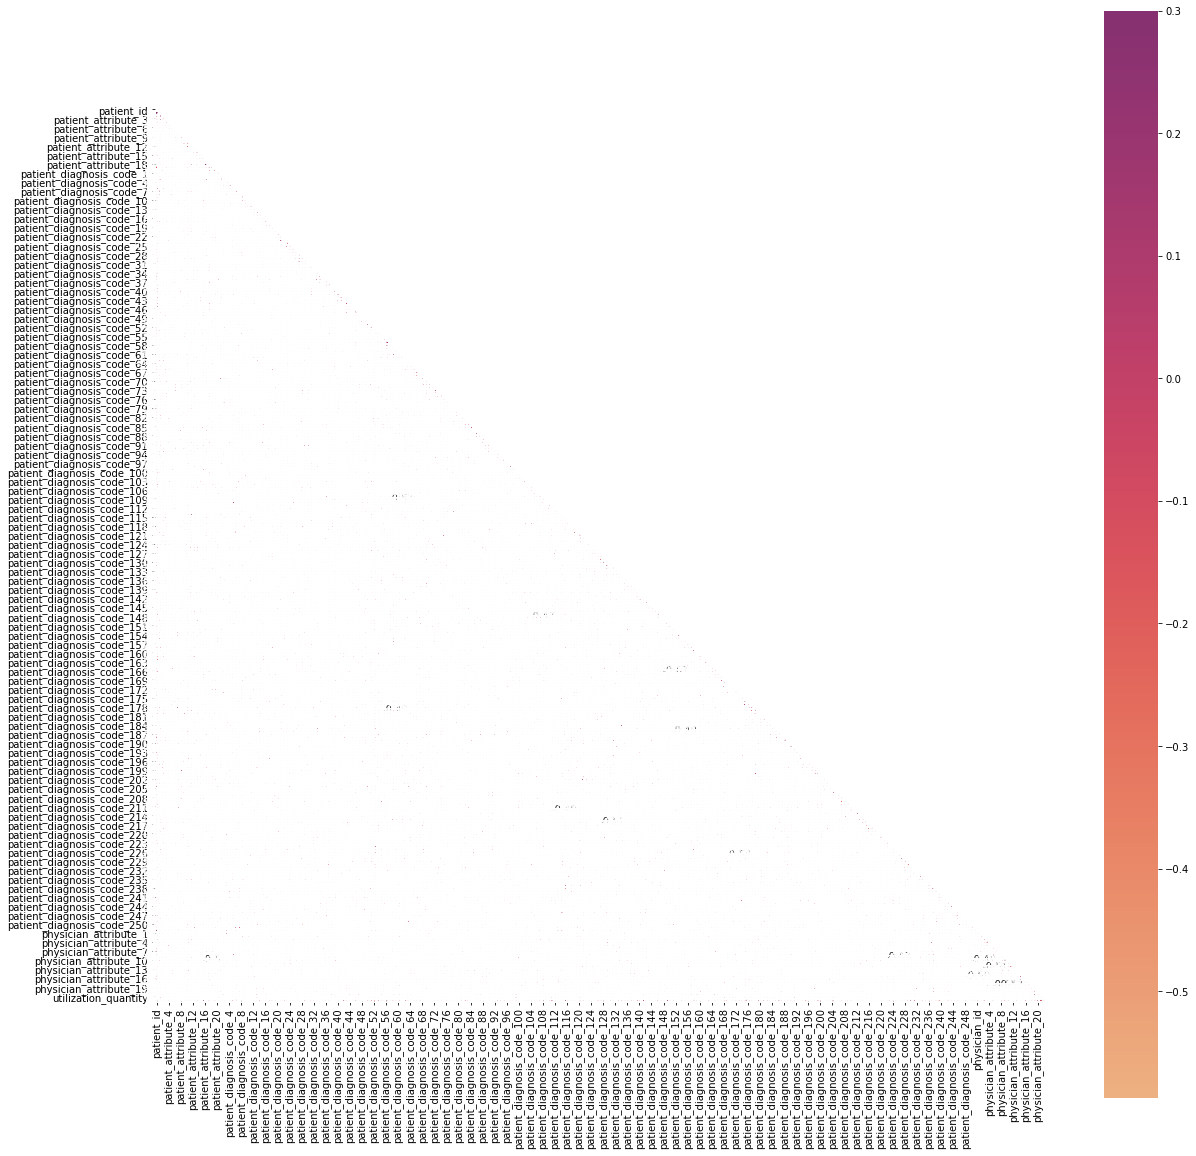

In [155]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("flare", as_cmap=True)

# Compute the correlation matrix
corr = final_table_prep_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.color_palette("flare", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)

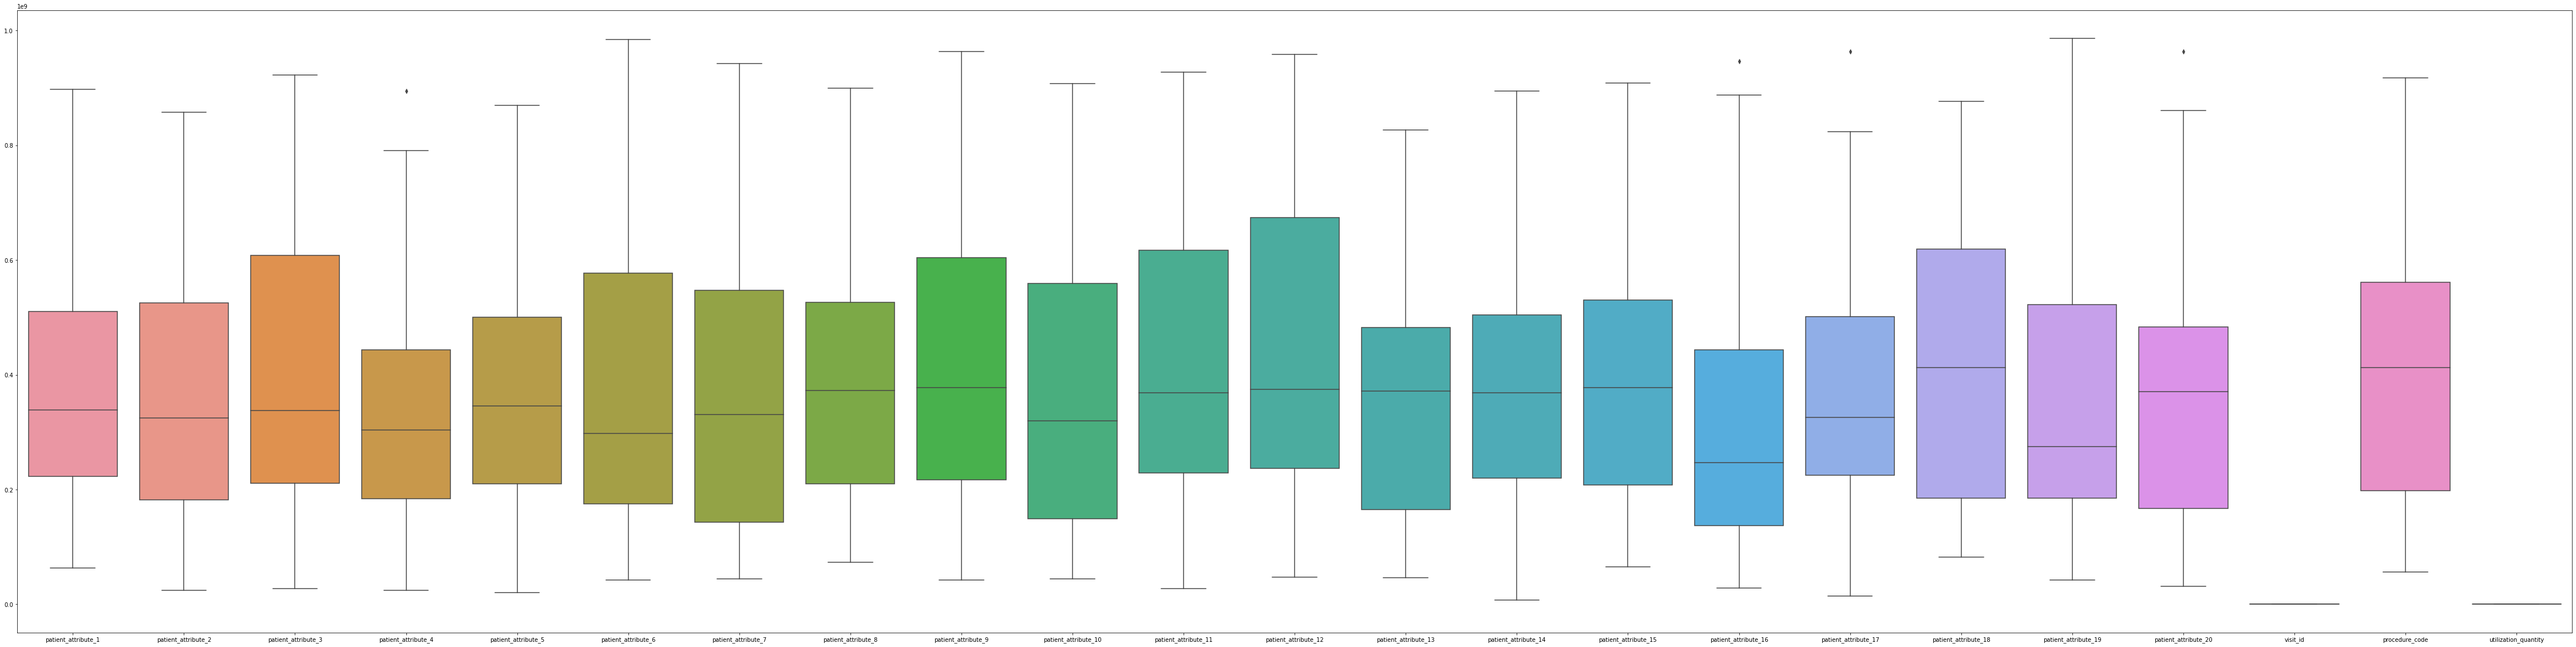

In [156]:
plt.figure(figsize=(80,20))

sns.boxplot(data=final_table)
plt.show()

### PCA

In [157]:
from sklearn.decomposition import PCA

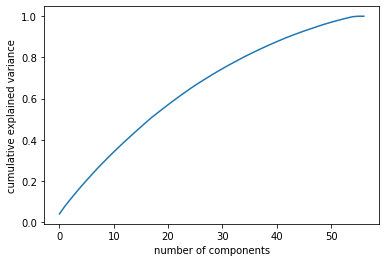

In [159]:
pca = PCA().fit(final_table_prep_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Select an appropriate amount of components

In [160]:
n_components = 50

pca = PCA(n_components=n_components)

In [161]:
pca.fit(final_table_prep_df)
X_pca = pca.transform(final_table_prep_df)
print("original shape:   ", final_table_prep_df.shape)
print("transformed shape:", X_pca.shape)

original shape:    (57, 296)
transformed shape: (57, 50)


In [174]:
pca_col_list = []
for x in range(X_pca.shape[1]):
    pca_col_list.append('principal_component_' + str(x + 1))
    
print(pca_col_list)

['principal_component_1', 'principal_component_2', 'principal_component_3', 'principal_component_4', 'principal_component_5', 'principal_component_6', 'principal_component_7', 'principal_component_8', 'principal_component_9', 'principal_component_10', 'principal_component_11', 'principal_component_12', 'principal_component_13', 'principal_component_14', 'principal_component_15', 'principal_component_16', 'principal_component_17', 'principal_component_18', 'principal_component_19', 'principal_component_20', 'principal_component_21', 'principal_component_22', 'principal_component_23', 'principal_component_24', 'principal_component_25', 'principal_component_26', 'principal_component_27', 'principal_component_28', 'principal_component_29', 'principal_component_30', 'principal_component_31', 'principal_component_32', 'principal_component_33', 'principal_component_34', 'principal_component_35', 'principal_component_36', 'principal_component_37', 'principal_component_38', 'principal_component

In [175]:
principalDf = pd.DataFrame(data = X_pca, columns = pca_col_list)

In [176]:
principalDf

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9,principal_component_10,...,principal_component_41,principal_component_42,principal_component_43,principal_component_44,principal_component_45,principal_component_46,principal_component_47,principal_component_48,principal_component_49,principal_component_50
0,-48.880887,21.842735,-13.476592,46.875666,53.646734,-25.066691,-70.719680,-47.192284,4.546918,-26.590218,...,15.695017,14.462637,-51.927053,34.724752,-16.981720,20.153828,7.618229,-12.731995,-8.117939,-13.452872
1,-13.270611,131.567419,28.584155,20.109392,-27.828453,28.339414,-21.874305,-17.583118,-55.256456,-39.022550,...,0.227264,-8.312966,-9.355985,14.451431,45.050641,-26.852482,10.045410,31.180680,0.746771,-20.219628
2,-58.846777,-28.722315,-25.971137,14.435185,94.232865,-5.411807,3.528834,15.234702,45.772591,27.399608,...,-16.835447,66.850046,5.575892,-33.714682,33.833752,-26.303725,4.863265,-19.923386,0.939739,-22.406623
3,-1.576397,50.090790,14.644794,58.040547,-73.296997,-35.952600,73.494188,-14.511567,-4.717472,-46.573815,...,-3.138534,-28.463691,27.838085,-32.199750,6.119078,5.512488,36.630182,-6.058459,-22.572469,6.983921
4,-49.932757,-48.642680,-38.803895,90.103681,1.547324,-30.275774,-37.222767,-42.850792,31.776348,-64.145682,...,7.404468,-8.468937,19.050927,3.130873,1.241066,47.956076,-17.689491,-5.117387,-6.572617,9.116924
5,-15.603633,14.985138,15.166020,-10.525021,3.267108,53.589357,7.045368,18.344876,77.328792,43.612245,...,4.736682,44.474804,-1.963655,-11.799322,-14.299257,7.233533,-18.768189,41.195413,-5.903178,1.992677
6,19.207320,36.276144,-54.290655,7.500330,42.581156,63.604878,83.075553,-85.740653,-3.511476,36.710889,...,6.854724,-33.041464,26.910575,9.936821,23.752265,31.093931,25.204467,9.167542,-10.577310,-42.238238
7,-42.672611,60.412674,-73.233410,-41.916531,38.637464,0.264449,-60.059536,15.916831,-62.875032,-13.732407,...,-36.751863,-7.269639,-21.263062,-25.272922,-47.240714,21.977582,27.149894,-24.240324,-9.057959,38.093160
8,12.873347,26.349804,32.066082,-49.983158,36.784169,45.341224,35.808318,17.560278,15.789674,-33.570906,...,-5.311587,-33.338693,-24.088189,1.277834,58.078505,32.161238,-2.074422,-8.930614,-13.197546,0.114904
9,8.640831,-33.332512,-67.345318,-44.351129,-61.959298,-31.267409,-6.779386,92.509991,-21.968460,12.219288,...,-2.567010,-26.964766,16.723323,21.033953,36.871194,18.644010,21.914765,-27.650368,28.685119,-49.883057


### Test Train Split

In [177]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(principalDf, test_size=0.2)